In [28]:
import pandas as pd
dt = pd.read_csv(r'D:\Users\ajof\Downloads\kruskal-anaju\kruskal-anaju\jazz.csv')
dt.head()

,*188 198
0,1 8 46
1,1 24 46
2,1 35 109
3,1 42 154
4,1 46 144


In [29]:
class DisjointSet:

    def __init__(self, n):
        self.parent = {i: i for i in range(1, n + 1)}

    # executa a operação MakeSet
    def makeSet(self, n):
        # cria conjuntos disjuntos `n` (um para cada vértice)
        for i in range(int(n)):
            self.parent[i] = i

    # Encontre a raiz do conjunto ao qual o elemento `k` pertence
    def find(self, k):
        # se `k` for root
        if self.parent[k] == k:
            return k

        # recorrente para o pai até encontrarmos a raiz
        return self.find(self.parent[k])

    # Realiza união de dois subconjuntos
    def union(self, a, b):
        # encontra a raiz dos conjuntos aos quais os elementos `x` e `y` pertencem
        x = self.find(a)
        y = self.find(b)

        self.parent[x] = y


# Função para construir MST usando o algoritmo de Kruskal
def runKruskalAlgorithm(edges, n):
    # armazena as arestas presentes no MST
    MST = []

    # Inicializa a classe `DisjointSet`.
    # Crie um conjunto singleton para cada elemento do universo.
    ds = DisjointSet(n)
    ds.makeSet(n)

    index = 0

    # classifica as arestas aumentando o peso
    edges.sort(key=lambda x: x[2])

    # MST contém exatamente bordas `V-1`
    while len(MST) != n - 1:

        # considera a próxima aresta com peso mínimo do gráfico
        (src, dest, weight) = edges[index]
        index = index + 1

        # encontre a raiz dos conjuntos para os quais dois terminais

        # vértices da próxima aresta pertencem
        x = ds.find(src)
        y = ds.find(dest)

        # se ambos os terminais tiverem pais diferentes, eles pertencem a
        # diferentes componentes conectados e podem ser incluídos no MST
        if x != y:
            MST.append((src, dest, weight))
            ds.union(x, y)

    return MST


# Parte principal

with open('jazz.csv') as f:
    lines = f.readlines()

# read number of nodes
_, nodes = lines[0].split()


# create an empty adjacency matrix
graph = {}
for line in lines:
    if line.startswith('*'):
        continue

    src, dest, weight = line.split()
    if src not in graph:
        graph[src] = {}
    if dest not in graph:
        graph[dest] = {}
    graph[src][dest] = weight
    graph[dest][src] = weight

# convert `graph` to a list of edges
edges = []
# (u, v, w) triples representam a borda não direcionada de
# vértice `u` para vértice `v` com peso `w`
for src, neighbors in graph.items():
    for dest, weight in neighbors.items():
        edges.append((int(src), int(dest), int(weight)))

# perform Kruskal's algorithm on the graph
mst = runKruskalAlgorithm(edges, int(nodes))
print(mst)

[(8, 121, 1), (60, 164, 1), (78, 108, 1), (95, 89, 1), (108, 178, 1), (57, 12, 1), (73, 88, 1), (61, 158, 1), (158, 178, 1), (123, 66, 1), (63, 66, 1), (35, 98, 2), (81, 7, 2), (131, 168, 2), (77, 28, 2), (86, 88, 2), (194, 174, 2), (146, 151, 2), (170, 195, 2), (18, 183, 2), (8, 171, 3), (95, 192, 3), (131, 44, 3), (131, 65, 3), (132, 193, 3), (150, 56, 3), (172, 149, 3), (173, 90, 3), (69, 161, 3), (93, 192, 3), (94, 177, 3), (114, 18, 3), (122, 105, 3), (105, 107, 3), (119, 134, 3), (95, 127, 4), (99, 122, 4), (131, 179, 4), (168, 121, 4), (102, 28, 4), (189, 73, 4), (19, 7, 4), (79, 49, 4), (96, 149, 4), (136, 94, 4), (136, 197, 4), (56, 178, 4), (70, 87, 4), (122, 33, 4), (59, 82, 4), (1, 78, 5), (24, 105, 5), (60, 179, 5), (101, 109, 5), (132, 170, 5), (169, 128, 5), (176, 28, 5), (51, 174, 5), (136, 45, 5), (136, 146, 5), (194, 129, 5), (7, 93, 5), (118, 9, 5), (23, 179, 5), (179, 50, 5), (24, 60, 6), (103, 71, 6), (132, 83, 6), (154, 110, 6), (150, 151, 6), (4, 173, 6), (147, 7

In [30]:
df = {'from': [], 'to': [], 'peso': []}
# (u, v, w) triples representam a borda não direcionada de
# vértice `u` para vértice `v` com peso `w`
for i in range(len(mst)):
        df['from'].append(mst[i][0])
        df['to'].append(mst[i][1])
        df['peso'].append(mst[i][2])
print(df)
    

{'from': [8, 60, 78, 95, 108, 57, 73, 61, 158, 123, 63, 35, 81, 131, 77, 86, 194, 146, 170, 18, 8, 95, 131, 131, 132, 150, 172, 173, 69, 93, 94, 114, 122, 105, 119, 95, 99, 131, 168, 102, 189, 19, 79, 96, 136, 136, 56, 70, 122, 59, 1, 24, 60, 101, 132, 169, 176, 51, 136, 136, 194, 7, 118, 23, 179, 24, 103, 132, 154, 150, 4, 147, 96, 136, 38, 135, 98, 14, 153, 13, 13, 149, 196, 10, 11, 32, 91, 91, 62, 24, 100, 5, 194, 196, 61, 135, 106, 103, 168, 171, 5, 26, 102, 51, 196, 111, 111, 114, 135, 167, 4, 138, 189, 149, 196, 70, 70, 42, 103, 153, 5, 85, 136, 6, 36, 55, 56, 121, 35, 53, 185, 180, 131, 54, 173, 189, 49, 112, 141, 195, 115, 173, 122, 118, 106, 74, 3, 79, 86, 90, 155, 162, 168, 168, 156, 153, 5, 152, 162, 121, 46, 169, 136, 78, 115, 23, 73, 194, 194, 81, 90, 125, 81, 197, 96, 155, 30, 115, 168, 5, 73, 150, 76, 72, 159, 15, 68, 159, 2, 144, 136, 119, 92, 155, 192, 149, 138], 'to': [121, 164, 108, 89, 178, 12, 88, 158, 178, 66, 66, 98, 7, 168, 28, 88, 174, 151, 195, 183, 171, 192, 

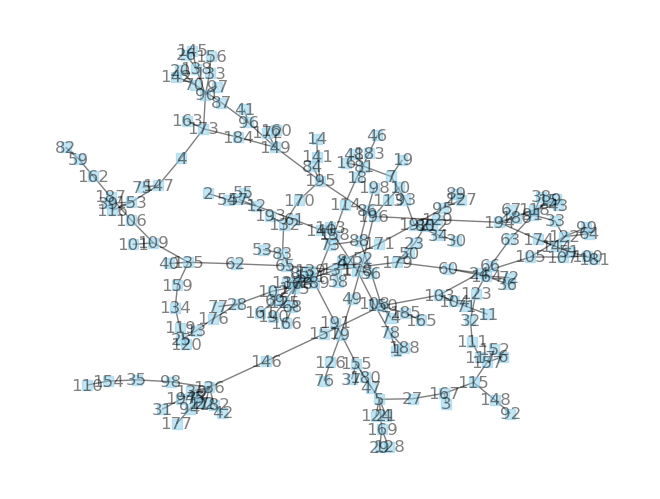

In [47]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Graph with Custom nodes:
nx.draw(G, with_labels=True, node_size=50, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=1)
plt.show()